In [18]:

import random
import warnings

import cv2
import numpy as np
from keras import layers, models
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

In [19]:
class CNN:
    @staticmethod
    def build(width, height, depth, classes):
        model = models.Sequential()
        inputShape = (height, width, depth)
        model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=inputShape))
        model.add(layers.BatchNormalization())
        model.add(layers.MaxPooling2D(2, 2))        
        model.add(layers.Conv2D(64, (3, 3), activation='relu'))
        model.add(layers.BatchNormalization())
        model.add(layers.MaxPooling2D(2, 2))
        model.add(layers.Flatten())
        model.add(layers.Dense(128, activation='relu'))
        model.add(layers.BatchNormalization())
        model.add(layers.Dense(classes, activation='softmax'))
        return model

In [20]:
def train_cnn(train_images, train_labels, val_images=np.array([]), val_labels=np.array([]), epochs=5):
    model = CNN.build(width=40, height=400, depth=1, classes=8)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])  #98.97 - adam 99.23 - rmsprop
    if val_images.size != 0 and val_labels.size != 0:
        model.fit(train_images, train_labels, epochs=epochs, batch_size=60, validation_data=(val_images, val_labels))
    else:
        model.fit(train_images, train_labels, epochs=epochs, batch_size=60)
    return model

In [21]:
def evalute_cnn(model, test_images, test_labels):
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    print(f'[INFO] Loss:{test_loss:.4f} Test accuracy: {(test_acc * 100):.4f}')

In [22]:
def calculate_f1_score(model, test_images, test_labels):
    test_prob = model.predict(test_images)
    test_pred = test_prob.argmax(axis=-1)
    f1 = f1_score(test_labels, test_pred, average='weighted')
    print(f'[INFO] F1-Score is:{f1:.4f}')
    return f1

In [23]:
def get_numpy_array_for_image(image_path):
    # print(image_path)
    img = cv2.imread(image_path)

    img_transformed = img[:, :, :1]

    img_transformed = 255 - img_transformed

    img_final = np.squeeze(img_transformed, axis=2)

    return img_final

In [24]:
import pandas as pd


def csv_to_array(file_path):
    df = pd.read_csv(file_path)
    return np.array(list(df['data_labels']))

In [25]:
import os

current_directory = os.getcwd()

os.chdir("D:/Pycharm Projects")

train_folder = rf"ThesisFinalData\smaller_scaled_images_rolling_window_6\train"

train_images = []

train_images_list = os.listdir(fr'{train_folder}\images')
train_images_list.sort(key=lambda x: int(x.split('_')[1]))

index = 0
for index, img in enumerate(train_images_list):
    print(index)
    index += 1
    train_images.append(get_numpy_array_for_image(rf'{train_folder}\images\{img}'))

train_images = np.array(train_images)

train_labels = csv_to_array(f'{train_folder}/train_data_labels_absolute_8.csv')

test_folder = rf"ThesisFinalData\smaller_scaled_images_rolling_window_6\test"

test_images = []

test_images_list = os.listdir(fr'{test_folder}\images')
test_images_list.sort(key=lambda x: int(x.split('_')[1]))

index = 0
for index, img in enumerate(test_images_list):
    print(index)
    index += 1
    test_images.append(get_numpy_array_for_image(rf'{test_folder}\images\{img}'))

test_images = np.array(test_images)

test_labels = csv_to_array(f'{test_folder}/test_data_labels_absolute_8.csv')

# os.chdir(current_directory)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [26]:
num_train_images = len(train_images)
print(f"number of training images: {num_train_images}")
train_images_order = list(range(num_train_images))
random.shuffle(train_images_order)
print(f"train images order {train_images_order}")
print(f"train images initial {train_images}")
print(f"train labels initial {train_labels}")
train_images = train_images[train_images_order]
train_labels = train_labels[train_images_order]
print(f"train images shuffled {train_images}")
print(f"train labels shuffled {train_labels}")

number of training images: 35593
train images order [15296, 8238, 16974, 32755, 30540, 25387, 24287, 3601, 2908, 29858, 28465, 10434, 12204, 4793, 25008, 18433, 22519, 26139, 27685, 25282, 16394, 1159, 28550, 10456, 2060, 20166, 26131, 25353, 9696, 9699, 2678, 27125, 2896, 21782, 25852, 6492, 16686, 9561, 18257, 21884, 28272, 6581, 2651, 10046, 11020, 8130, 19080, 25243, 5829, 19999, 15092, 16132, 15899, 22339, 24419, 27663, 8412, 4048, 32140, 9948, 3637, 12168, 1566, 3216, 33451, 16109, 8045, 15841, 16982, 25775, 1192, 8250, 20450, 28552, 11091, 20992, 5861, 18133, 9720, 35393, 19010, 27602, 10301, 21260, 23944, 11297, 10616, 3405, 30038, 23993, 29288, 18635, 20111, 9860, 22129, 21819, 16294, 5521, 10015, 23701, 11018, 13805, 4794, 33140, 26810, 4959, 22450, 2845, 8828, 29148, 34082, 19740, 33216, 27488, 536, 8464, 19328, 11491, 26436, 9695, 14947, 22515, 1257, 33408, 33055, 8320, 5102, 28142, 13637, 17528, 24640, 18038, 30317, 19961, 8554, 10660, 3790, 6422, 27773, 21575, 20764, 2704

In [27]:
print(f"number of training images: {len(train_images)}")
print(f"number of testing images: {len(test_images)}")

number of training images: 35593
number of testing images: 8899


In [28]:
print(f"number of training data labels {len(train_labels)}")
print(f"number of training data labels {len(test_labels)}")

number of training data labels 35593
number of training data labels 8899


In [29]:
all_images_folder = rf"ThesisFinalData\smaller_scaled_images_rolling_window_6\all images"
all_grayscale_images = {file for file in os.listdir(all_images_folder) if file.endswith('grayscale.png')}

print(f"number of all images: {len(all_grayscale_images)}")
train_plus_test_set = set(train_images_list + test_images_list)
print(train_plus_test_set - all_grayscale_images)
assert train_plus_test_set == all_grayscale_images


number of all images: 44492
set()


In [30]:
print("image shape: ", train_images[0].shape)
print("label: ", train_labels[0])
train_images[0]

image shape:  (400, 40)
label:  2


array([[  6,   6,   6, ...,   6,   6,   6],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [109, 109, 109, ..., 109, 109, 109]], dtype=uint8)

In [31]:
# (train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape(train_images.shape[0], 400, 40, 1)
test_images = test_images.reshape(test_images.shape[0], 400, 40, 1)

# train_images = train_images.astype('float16')
# test_images = test_images.astype('float16')

train_images, test_images = train_images / 255, test_images / 255


In [32]:
del all_grayscale_images
del train_plus_test_set
del train_images_list
del test_images_list

In [33]:
train_images

array([[[[0.02352941],
         [0.02352941],
         [0.02352941],
         ...,
         [0.02352941],
         [0.02352941],
         [0.02352941]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        ...,

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.42745098],
         [0.42745098],
         [0.42745098],
         ...,
         [0.42745098],
         [0.42745098],
         [0.42745098]]],


       [[[0.02352941],
         [0.02352941],
         [0.02

In [34]:
train_images[0]

array([[[0.02352941],
        [0.02352941],
        [0.02352941],
        ...,
        [0.02352941],
        [0.02352941],
        [0.02352941]],

       [[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       ...,

       [[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.42745098],
        [0.42745098],
        [0.42745098],
        ...,
        [0.42745098],
        [0.42745098],
        [0.42745098]]])

In [35]:
train_labels

array([2, 4, 4, ..., 7, 4, 0])

In [36]:
print(list(train_labels).count(0))

1675


In [37]:
test_labels

array([4, 5, 4, ..., 4, 6, 5])

In [38]:
print(test_labels[-3:])

[4 6 5]


In [39]:
train_images_dummy = train_images[:9]
test_images_dummy = train_images[:9]
train_labels_dummy = train_labels[:9]
test_labels_dummy = train_labels[:9]
print(train_images_dummy)
print(train_labels_dummy)
print(test_images_dummy)
print(test_labels_dummy)

[[[[0.02352941]
   [0.02352941]
   [0.02352941]
   ...
   [0.02352941]
   [0.02352941]
   [0.02352941]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  ...

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.42745098]
   [0.42745098]
   [0.42745098]
   ...
   [0.42745098]
   [0.42745098]
   [0.42745098]]]


 [[[0.02352941]
   [0.02352941]
   [0.02352941]
   ...
   [0.02352941]
   [0.02352941]
   [0.02352941]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   ...
   [0.        ]
   [0.        ]
   [0.        ]]

  ...

  [[0.        ]
   [0.        ]
   [0. 

In [40]:
# model = train_cnn(train_images_dummy,train_labels_dummy,test_images_dummy,test_labels_dummy, epochs = 5)
# print(model.predict(test_images_dummy))
# evalute_cnn(model,test_images_dummy,test_labels_dummy)
# calculate_f1_score(model,test_images_dummy,test_labels_dummy)
model = train_cnn(train_images, train_labels, test_images, test_labels, epochs=5)
# model = train_cnn(train_images,train_labels)
evalute_cnn(model, test_images, test_labels)
calculate_f1_score(model, test_images, test_labels)

D:\Pycharm Projects\ThesisFinal\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
594/594 ━━━━━━━━━━━━━━━━━━━━ 382s 639ms/step - accuracy: 0.2576 - loss: 2.0424 - val_accuracy: 0.2813 - val_loss: 1.9128
Epoch 2/5
594/594 ━━━━━━━━━━━━━━━━━━━━ 322s 542ms/step - accuracy: 0.2891 - loss: 1.7825 - val_accuracy: 0.1844 - val_loss: 3.6184
Epoch 3/5
594/594 ━━━━━━━━━━━━━━━━━━━━ 326s 549ms/step - accuracy: 0.2955 - loss: 1.7526 - val_accuracy: 0.2819 - val_loss: 9.8999
Epoch 4/5
594/594 ━━━━━━━━━━━━━━━━━━━━ 325s 547ms/step - accuracy: 0.2954 - loss: 1.7396 - val_accuracy: 0.2803 - val_loss: 2.2447
Epoch 5/5
594/594 ━━━━━━━━━━━━━━━━━━━━ 326s 549ms/step - accuracy: 0.3004 - loss: 1.7330 - val_accuracy: 0.0975 - val_loss: 2.3084
279/279 ━━━━━━━━━━━━━━━━━━━━ 13s 46ms/step - accuracy: 0.1148 - loss: 2.2436
[INFO] Loss:2.3084 Test accuracy: 9.7539
279/279 ━━━━━━━━━━━━━━━━━━━━ 13s 46ms/step
[INFO] F1-Score is:0.0923


0.09227544442389919

In [ ]:
model_predictions = model.predict(test_images)

In [29]:
predicted_test_labels = []

for row in model_predictions:
    max_value_in_row = max(row)
    predicted_test_label = list(row).index(max_value_in_row)
    predicted_test_labels.append(predicted_test_label)

predicted_test_labels

[4,
 3,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 3,
 4,
 4,
 4,
 3,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 5,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 4,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 4,
 4,
 3,
 3,
 4,
 4,
 3,
 4,
 3,
 3,
 3,
 4,
 4,
 4,
 3,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 3,
 3,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 5,
 4,
 4,
 4,
 3,
 3,
 4,
 4,
 4,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 3,
 3,
 4,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 0,
 4,
 4,
 3,
 3,
 3,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 3,
 4,
 4,
 3,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 5,
 4,
 3,
 5,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 5,
 3,
 4,
 4,
 2,
 4,
 4,
 4,
 4,


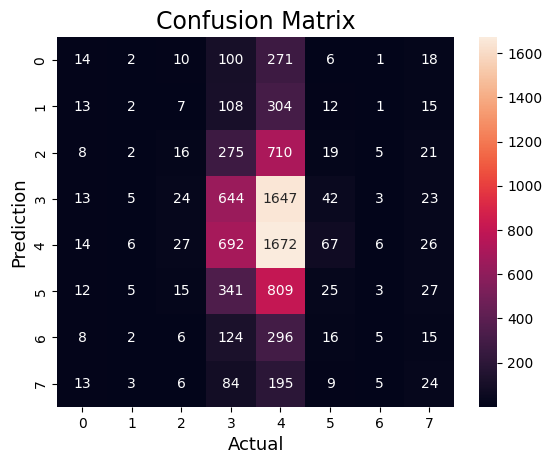

In [30]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(test_labels, predicted_test_labels)

sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=[0, 1, 2, 3, 4, 5, 6, 7],
            yticklabels=[0, 1, 2, 3, 4, 5, 6, 7])
plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()
# Why are these values different from the ones calculated above ?

# TP - predicted 3,4 actual 3,4 = 4655
# TN - predicted 0,1,2,5,6,7 actual 0,1,2,5,6,7 = 74 + 70 + 129 + 98 = 371
# FP - predicted 3,4 actual 0,1,2,5,6,7 = 89 + 167 = 256
# FN - predicted 0,1,2,5,6,7 actual 3,4 = 1768 + 1849 = 3617

# total = 4655 + 371 + 256 + 3617 = 8899

# accuracy = (4655 + 371) / 8899 = 0.56
# recall = 4655 / (4655 + 3617) = 0.56
# F1 = 2 * (0.56 * 0.56) / (0.56 + 0.56) = 0.56

In [31]:
def crossover(c1, c2, min_width=1, h_lower_bound=2, h_upper_bound=10):
    height, width, depth = c1.shape
    start_h = np.random.randint(1, height // 2 + 1)
    end_h = np.random.randint(start_h + h_lower_bound, min(start_h + h_upper_bound, height))
    start_w = np.random.randint(0, width - min_width)
    end_w = np.random.randint(start_w + min_width, width)
    c1_sliced = c1.copy()
    c2_sliced = c2.copy()
    c1_sliced[start_h:end_h, start_w:end_w, :] = c2[start_h:end_h, start_w:end_w, :]
    c2_sliced[start_h:end_h, start_w:end_w, :] = c1[start_h:end_h, start_w:end_w, :]
    return c1_sliced, c2_sliced

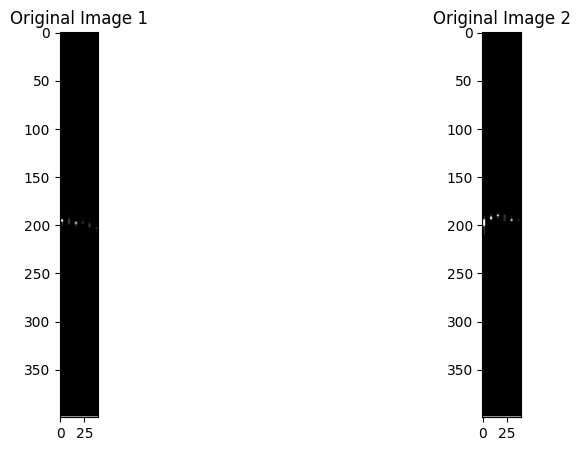

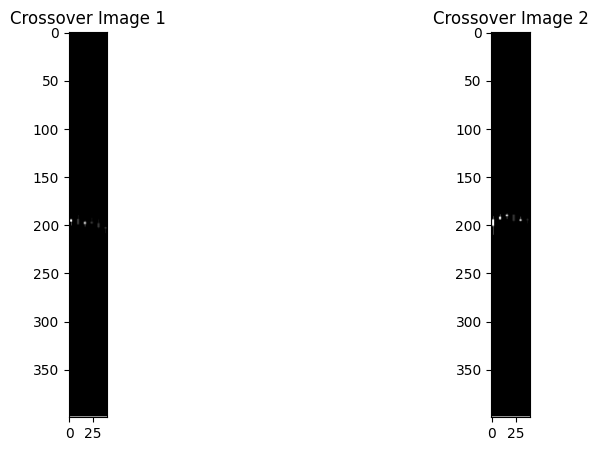

In [32]:
org1 = train_images[np.random.randint(0, len(train_images))]
org2 = train_images[np.random.randint(0, len(train_images))]
c1_crossover, c2_crossover = crossover(org1, org2)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(org1.squeeze(), cmap='gray')
plt.title('Original Image 1')
plt.subplot(1, 2, 2)
plt.imshow(org2.squeeze(), cmap='gray')
plt.title('Original Image 2')
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(c1_crossover.squeeze(), cmap='gray')
plt.title('Crossover Image 1')
plt.subplot(1, 2, 2)
plt.imshow(c2_crossover.squeeze(), cmap='gray')
plt.title('Crossover Image 2')
plt.show()

In [33]:
def mutation(m, d=5):
    mutated_image = m.copy()
    step = np.random.randint(-d, d + 1) / 255.
    mask = np.random.choice([True, False], size=mutated_image.shape)
    mutated_image[mask] += step
    return mutated_image

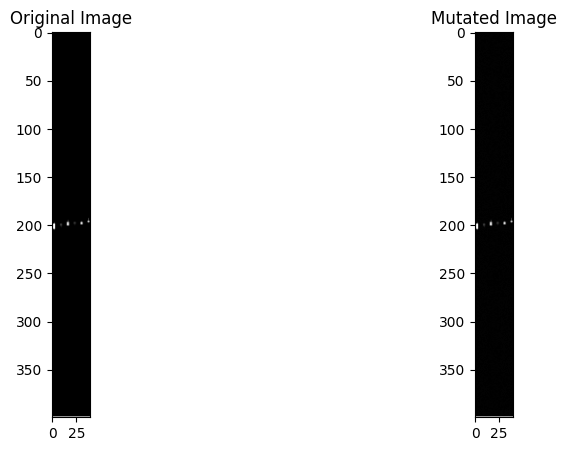

In [34]:
image = train_images[np.random.randint(0, len(train_images))]
mutated_image = mutation(image)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image.squeeze(), cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(mutated_image.squeeze(), cmap='gray')
plt.title('Mutated Image')
plt.show()

In [35]:
def anneal(alpha, mask_a, d=2, lower_bound=2, upper_bound=10):
    alpha = alpha.copy()
    mask_b = np.random.choice([True, False], size=alpha.shape)
    mask = mask_a ^ mask_b
    step = np.random.randint(-d, d + 1, size=alpha.shape) / 225.
    start_h = np.random.randint(0, lower_bound)
    end_h = np.random.randint(alpha.shape[0] - upper_bound, alpha.shape[0])
    start_w = np.random.randint(0, lower_bound)
    end_w = np.random.randint(alpha.shape[1] - upper_bound, alpha.shape[1])
    masksliced = np.zeros(alpha.shape, dtype=bool)
    masksliced[start_h:end_h, start_w:end_w] = mask[start_h:end_h, start_w:end_w]
    # print(masksliced.shape)
    # print(alpha.shape)
    alpha[masksliced] += step[masksliced]
    return alpha

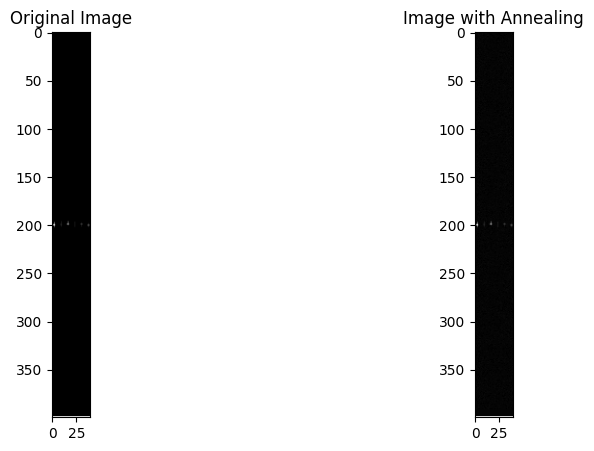

In [36]:
image = train_images[np.random.randint(0, len(train_images))]
mask_a = np.random.choice([True, False], size=image.shape)
anneal_image = anneal(image, mask_a)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image.squeeze(), cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(anneal_image.squeeze(), cmap='gray')
plt.title('Image with Annealing')
plt.show()

In [37]:
def calculate_recall(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    # print(y_test,y_pred_classes)
    recall = recall_score(y_test, y_pred_classes, average='weighted')
    # print(recall)
    return recall

In [38]:
def fitness(X, Y, alpha_population, model, lambda_value=0.1):
    fitness_values = []
    for alpha, alpha_label in alpha_population:
        # print(alpha.shape)
        # print(alpha_label.shape)      
        # X_fitness = np.concatenate([X, alpha], axis=0)
        # Y_fitness = np.concatenate([Y, alpha_label], axis=0)
        # error = lambda_value * calculate_recall(model,X_fitness,Y_fitness)
        error = lambda_value * calculate_recall(model, alpha, alpha_label)
        alpha_fitness = 1 + error - np.linalg.norm(alpha)
        # print(error,np.linalg.norm(alpha),alpha_fitness)
        fitness_values.append(abs(np.max(alpha_fitness)))
    # best_index = np.argmax(fitness_values)
    # print(best_index)
    return fitness_values  #if needed put this too alpha_population[best_index]

In [39]:
X_sample = train_images[:4]
y_sample = train_labels[:4]
# print(X_sample.shape)
# print(y_sample.shape)
alpha_population_sample = [(np.expand_dims(x, axis=0), np.array([y])) for x, y in zip(X_sample, y_sample)]
# alpha_population_sample = [(np.random.rand(1,28, 28, 1), np.random.randint(0, 5, size=(1,))) for _ in range(3)]
# print(alpha_population_sample)
fitness_values = fitness(X_sample, y_sample, alpha_population_sample, model)
print("Fitness values for the sample alpha population:")
print(fitness_values)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Fitness values for the sample alpha population:
[2.929317833795709, 2.893620014409341, 2.3430147755150297, 2.6407345545762895]


D:\Pycharm Projects\ThesisFinal\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Pycharm Projects\ThesisFinal\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Pycharm Projects\ThesisFinal\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Pycharm Projects\Thesi

In [40]:
def selection(parents, z=0.5):
    fitness_values = fitness(train_images, train_labels, parents, model)
    num_parents = len(parents)
    num_offspring = int(num_parents * z)
    selected_indices = np.random.choice(num_parents, num_offspring, replace=False,
                                        p=fitness_values / np.sum(fitness_values))
    offspring = [parents[i] for i in selected_indices]
    parents_next_gen = [parents[i] for i in range(num_parents) if i not in selected_indices]
    return parents_next_gen, offspring

In [41]:
# X_sample = train_images[:5]
# y_sample = train_labels[:5]
# model = train_cnn(X_sample, y_sample)
# maxpayoff = 0
# exitloop = False
# population = [(np.expand_dims(x, axis=0),np.array([y])) for x,y in zip(X_sample, y_sample)]
# # print(population)
# F_Xtrain = fitness(X_sample, y_sample, population,model)
# print(F_Xtrain)
# gen = 0

# best_index = np.argmax(F_Xtrain)
# print(best_index)
# acurr, currpayoff = population[best_index], F_Xtrain[best_index]  # what is the max show with the fitness example and what is this acurr
# # print(acurr[0],acurr[1])
# print(currpayoff)
# X_sample = np.concatenate([X_sample, acurr[0]], axis=0)
# y_sample = np.concatenate([y_sample, acurr[1]], axis=0)
# model = train_cnn(X_sample, y_sample) 

In [42]:
def twoplayergame_ga(Xtrain, Ytrain, maxiter=100):
    model = train_cnn(Xtrain, Ytrain)
    exitloop = False
    population = [(np.expand_dims(x, axis=0), np.array([y])) for x, y in zip(Xtrain, Ytrain)]
    F_Xtrain = fitness(Xtrain, Ytrain, population, model)
    maxpayoff = np.max(F_Xtrain)
    gen = 0
    while gen < maxiter and not exitloop:
        best_index = np.argmax(F_Xtrain)
        # print(F_Xtrain)
        acurr, currpayoff = population[best_index], F_Xtrain[best_index]
        Xcurr = np.concatenate([Xtrain, acurr[0]], axis=0)
        Ycurr = np.concatenate([Ytrain, acurr[1]], axis=0)
        model = train_cnn(Xcurr, Ycurr, epochs=1)
        print("The currpayoff is :", currpayoff)
        if abs(currpayoff - maxpayoff) < 0.1:  # the currpayoff issue is coming
            maxpayoff = currpayoff
            parents, offspring = selection(population, 0.5)

            new_offspring = []
            for i in range(0, len(offspring) - 1, 2):
                child1, child2 = crossover(np.squeeze(offspring[i][0], axis=0), np.squeeze(offspring[i + 1][0], axis=0))
                new_offspring.append((child1, offspring[i][1]))
                new_offspring.append((child2, offspring[i + 1][1]))

            curr_offspring = []
            for mutant, label in new_offspring:
                curr_offspring.append((np.expand_dims(mutation(mutant), axis=0), label))

            curr_population = parents + curr_offspring
            population = curr_population.copy()
            F_Xtrain = fitness(Xtrain, Ytrain, population, model)
        else:
            exitloop = True

        gen += 1

    final_index = np.argmax(F_Xtrain)
    acurr, maxpayoff = population[final_index], F_Xtrain[final_index]
    return acurr

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.2000 - loss: 2.0844
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 1.0000 - loss: 2.0269
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.6000 - loss: 1.8925
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.6000 - loss: 1.6531
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.6000 - loss: 1.2978
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0000e+00 - loss: 2.0799
The currpayoff is : 2.893620014409341
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━

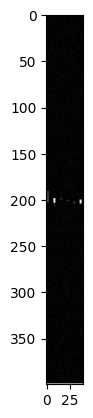

In [43]:
warnings.filterwarnings('ignore')
X_sample = train_images[:5]
y_sample = train_labels[:5]
acurr = twoplayergame_ga(X_sample, y_sample)
print(acurr[1])
plt.imshow(acurr[0].squeeze(), cmap='gray')

In [44]:
def twoplayergame_sa(Xtrain, Ytrain):
    model = train_cnn(Xtrain, Ytrain)
    maxpayoff = 0
    exitloop = False
    Tmax = 10
    Tmin = 5
    v = 5  # this should be 50
    p = 0.6
    mask = np.random.choice([True, False], size=Xtrain[0].shape)
    Tcurr = Tmax
    population = [(np.expand_dims(x, axis=0), np.array([y])) for x, y in zip(Xtrain, Ytrain)]
    random.shuffle(population)
    pop_size = len(population) // 3
    ac = population[:pop_size].copy()
    ag = population[pop_size:2 * pop_size].copy()
    an = population[2 * pop_size:].copy()
    evalc = fitness(Xtrain, Ytrain, ac, model)
    maxpayoff = max(fitness(Xtrain, Ytrain, ag, model))
    while not exitloop:
        evalg = fitness(Xtrain, Ytrain, ag, model)
        curr_index = np.argmax(evalg)
        currpayoff = evalg[curr_index]
        print("The current Payoff is:", currpayoff)
        if abs(currpayoff - maxpayoff) < 0.1:
            maxpayoff = currpayoff
            while Tcurr >= Tmin:
                i = 1
                while i <= v:
                    temp = []
                    for ele, label in ac:
                        temp.append((np.expand_dims(anneal(np.squeeze(ele, axis=0), mask), axis=0), label))
                    an = temp.copy()
                    evaln = fitness(Xtrain, Ytrain, an, model)
                    print(max(evaln), max(evalc), max(evalg))
                    if max(evaln) > max(evalc):
                        ac = an.copy()
                        evalc = evaln.copy()
                        if max(evalg) < max(evaln):
                            ag = an.copy()
                            evalg = evaln.copy()
                    else:
                        if np.random.random() <= np.exp((max(evaln) - max(evalc)) / Tcurr):
                            ac = an.copy()
                            evalc = evaln.copy()
                    i += 1
                Tcurr *= p
            ag = ac.copy()
        else:
            exitloop = True
    return ag[np.argmax(fitness(Xtrain, Ytrain, ag, model))]



Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.1000 - loss: 2.0819
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.7000 - loss: 2.0308
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.6000 - loss: 1.9164
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.6000 - loss: 1.7252
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.6000 - loss: 1.4825
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
The current Payoff is: 2.929275795616324
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
3.3173236172259717 3.2904523707366105 2.929275795616324
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1

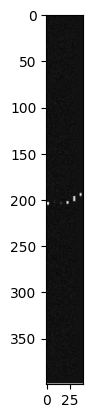

In [45]:
X_sample = train_images[:10]
y_sample = train_labels[:10]
ag = twoplayergame_sa(X_sample, y_sample)
# print(ag)
print(ag[1])
plt.imshow(ag[0].squeeze(), cmap='gray')

In [46]:
def generate_manipulated_data(images, labels, A_s):
    if len(A_s) == 1:
        alphas, alpha_labels = A_s[0][0], A_s[0][1]
    else:
        alphas, alpha_labels = list(zip(*A_s))
        # print(alphas)
        alphas = np.squeeze(alphas, axis=1)
        # print(alphas.shape)
        # print(alpha_labels)
        alpha_labels = np.squeeze(alpha_labels)
        # print(alpha_labels.shape)
    X_manipulated = np.concatenate([images, alphas], axis=0)
    Y_manipulated = np.concatenate([labels, alpha_labels], axis=0)
    return X_manipulated, Y_manipulated

In [47]:
X_sample = train_images[:100]
y_sample = train_labels[:100]
print(X_sample.shape)
print(y_sample.shape)
A_s = [(np.random.rand(1, 400, 40, 1), np.random.randint(0, 5, size=(1,))) for _ in range(10)]
# print(alpha_population_sample)
x_check, y_check = generate_manipulated_data(X_sample, y_sample, A_s)
print(x_check.shape)
print(y_check.shape)

(100, 400, 40, 1)
(100,)
(110, 400, 40, 1)
(110,)


In [48]:
def adversarial_manipulation(X_train, Y_train, X_test, Y_test, M, gametype):
    A_s = []
    for i in range(1, M + 1):
        if gametype == 'GA':
            a_i = twoplayergame_ga(X_train, Y_train)  #remove max_iter
        elif gametype == 'SA':
            a_i = twoplayergame_sa(X_train, Y_train)
        else:
            raise ValueError("Invalid gametype")
        A_s.append(a_i)

    X_train_manipulated, Y_train_manipulated = generate_manipulated_data(X_train, Y_train, A_s)
    X_test_manipulated, Y_test_manipulated = generate_manipulated_data(X_test, Y_test, A_s)

    cnn_model = train_cnn(X_train, Y_train, X_test, Y_test)
    f1_score_manipulated = calculate_f1_score(cnn_model, X_test_manipulated, Y_test_manipulated)

    cnn_model_secure = train_cnn(X_train_manipulated, Y_train_manipulated, X_test_manipulated, Y_test_manipulated)
    f1_score_secure = calculate_f1_score(cnn_model_secure, X_test_manipulated, Y_test_manipulated)

    return A_s, f1_score_manipulated, f1_score_secure

In [49]:
model = train_cnn(train_images[:1000], train_labels[:1000], test_images[:1000], test_labels[:1000])
f1_score_normal = calculate_f1_score(model, test_images, test_labels)

A_s, f1_score_manipulated, f1_score_secure = adversarial_manipulation(train_images[:1000], train_labels[:1000],
                                                                      test_images[:1000], test_labels[:1000], 1, 'SA')
print(f1_score_normal, f1_score_manipulated, f1_score_secure)

Epoch 1/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 346ms/step - accuracy: 0.2934 - loss: 1.8061 - val_accuracy: 0.3280 - val_loss: 1.6917
Epoch 2/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 329ms/step - accuracy: 0.3841 - loss: 1.5025 - val_accuracy: 0.3440 - val_loss: 1.6529
Epoch 3/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 357ms/step - accuracy: 0.3594 - loss: 1.5487 - val_accuracy: 0.3290 - val_loss: 1.6917
Epoch 4/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 355ms/step - accuracy: 0.3701 - loss: 1.4794 - val_accuracy: 0.3420 - val_loss: 1.6717
Epoch 5/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 332ms/step - accuracy: 0.4192 - loss: 1.4654 - val_accuracy: 0.3360 - val_loss: 1.7027
279/279 ━━━━━━━━━━━━━━━━━━━━ 12s 42ms/step
[INFO] F1-Score is:0.1891
Epoch 1/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 325ms/step - accuracy: 0.3002 - loss: 1.7876
Epoch 2/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 265ms/step - accuracy: 0.3630 - loss: 1.5546
Epoch 3/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 261ms/step - accuracy: 0.3590 - loss: 1.5198
Epoch 4/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 3

In [50]:
model = train_cnn(train_images[:1000], train_labels[:1000], test_images[:1000], test_labels[:1000])
f1_score_normal = calculate_f1_score(model, test_images, test_labels)

A_s, f1_score_manipulated, f1_score_secure = adversarial_manipulation(train_images[:1000], train_labels[:1000],
                                                                      test_images[:1000], test_labels[:1000], 1, 'GA')
print(f1_score_normal, f1_score_manipulated, f1_score_secure)

Epoch 1/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 418ms/step - accuracy: 0.3473 - loss: 1.8096 - val_accuracy: 0.3220 - val_loss: 1.6730
Epoch 2/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 413ms/step - accuracy: 0.3517 - loss: 1.5677 - val_accuracy: 0.3250 - val_loss: 1.6796
Epoch 3/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 345ms/step - accuracy: 0.3708 - loss: 1.5262 - val_accuracy: 0.3190 - val_loss: 1.6642
Epoch 4/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 474ms/step - accuracy: 0.3531 - loss: 1.5033 - val_accuracy: 0.3240 - val_loss: 1.6848
Epoch 5/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 318ms/step - accuracy: 0.3952 - loss: 1.4828 - val_accuracy: 0.3270 - val_loss: 1.7030
279/279 ━━━━━━━━━━━━━━━━━━━━ 13s 46ms/step
[INFO] F1-Score is:0.1985
Epoch 1/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 245ms/step - accuracy: 0.3486 - loss: 1.7829
Epoch 2/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 248ms/step - accuracy: 0.3662 - loss: 1.5059
Epoch 3/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 246ms/step - accuracy: 0.3780 - loss: 1.5241
Epoch 4/5
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 3

In [51]:
# model = train_cnn(train_images ,train_labels ,test_images,test_labels)
# f1_score_normal = calculate_f1_score(model,test_images,test_labels)

# A_s, f1_score_manipulated, f1_score_secure = adversarial_manipulation(train_images,train_labels,test_images,test_labels, 1, 'GA')
# print(f1_score_normal, f1_score_manipulated, f1_score_secure)